In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
filepath = 'C:/Users/DELL/OneDrive/Desktop/Power BI/VNL2023.csv'
df = pd.read_csv(filepath)
df.head()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


In [18]:
df.shape

(131, 10)

In [20]:
df.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


# Data Preprocessing

In [22]:
df.isna().sum()

Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [39]:
position_counts = df["Position"].value_counts()
position_counts.index

Index(['OH', 'MB', 'OP', 'S', 'L'], dtype='object', name='Position')

# Plotting Pie Chart

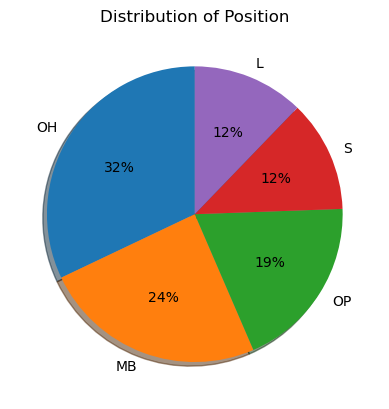

In [50]:
plt.pie(position_counts,labels = position_counts.index , shadow=True,autopct = '%1.0f%%',startangle=90)
plt.title("Distribution of Position")
plt.show()

In [54]:
avg_attack_by_country=df.groupby("Country")["Attack"].mean()
avg_attack_by_country

Country
Argentina    5.925000
Brazil       5.250000
Bulgaria     5.282500
Canada       5.405714
China        5.093750
Cuba         6.344286
France       6.670000
Germany      4.833750
Iran         4.707778
Italy        5.965000
Japan        6.595000
Nederland    5.880000
Poland       5.807000
Serbia       5.998750
Slovenia     5.961250
USA          4.600000
Name: Attack, dtype: float64

In [68]:
block_by_country = df.groupby("Country")["Block"].mean()
#block_by_country_max = df.groupby("Country")["Block"].max()
block_by_country

Country
Argentina    1.060000
Brazil       0.787500
Bulgaria     0.745000
Canada       0.725714
China        0.707500
Cuba         0.965714
France       0.908000
Germany      0.630000
Iran         0.932222
Italy        1.261250
Japan        0.551250
Nederland    0.774286
Poland       0.818000
Serbia       1.037500
Slovenia     0.846250
USA          0.761111
Name: Block, dtype: float64

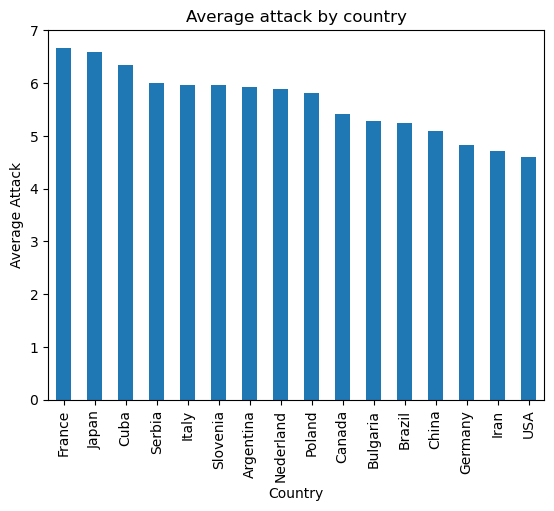

In [200]:
avg_attack_by_country.sort_values(ascending = False).plot(kind="bar")
#avg_attack_by_country.sort_values(ascending = True).head(5).plot(kind="bar")
#avg_attack_by_country.sort_values(ascending = True).tail(5).plot(kind="bar")
plt.title("Average attack by country")
plt.xlabel("Country")
plt.ylabel("Average Attack")
plt.show()

In [87]:
avg_serve_by_age = df.groupby("Age")["Serve"].mean()
avg_serve_by_age.sort_values(ascending = True)

Age
41    0.000000
34    0.026667
25    0.165714
19    0.200000
37    0.270000
32    0.290000
33    0.321429
38    0.400000
30    0.429231
29    0.477500
23    0.526667
22    0.534286
24    0.640667
36    0.660000
27    0.662500
35    0.666667
28    0.667273
26    0.681053
21    0.770000
20    0.880000
31    0.910000
Name: Serve, dtype: float64

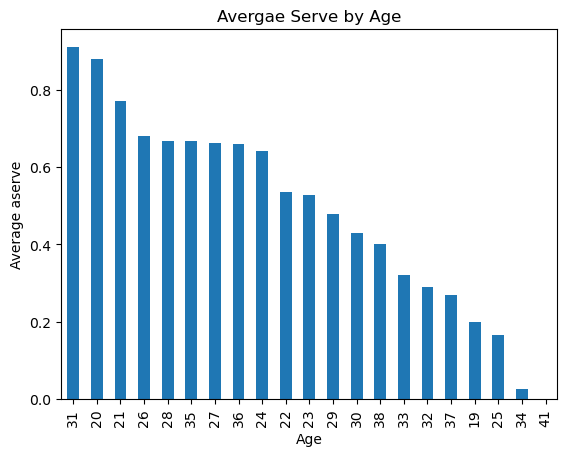

In [93]:
avg_serve_by_age.sort_values(ascending = False).plot(kind="bar")
#avg_serve_by_age.sort_values(ascending = False).plot(kind="pie")
plt.title("Avergae Serve by Age")
plt.ylabel("Average aserve")
plt.show()

In [118]:
player_name= df.groupby(["Player","Country"])["Attack"].max()
player_name

Player             Country  
Abdel-Aziz Nimir   Nederland    15.33
Anderson Matthew   USA           9.07
Andringa Robbert   Nederland     0.00
Asparuhov Asparuh  Bulgaria      5.92
Atanasov Martin    Bulgaria      8.33
                                ...  
Yu Yuantai         China         6.92
Zatorski Pawel     Poland        0.00
Zerba Nicolas      Argentina     3.08
Zhai Dejun         China         4.17
Zhang Jingyin      China        13.50
Name: Attack, Length: 131, dtype: float64

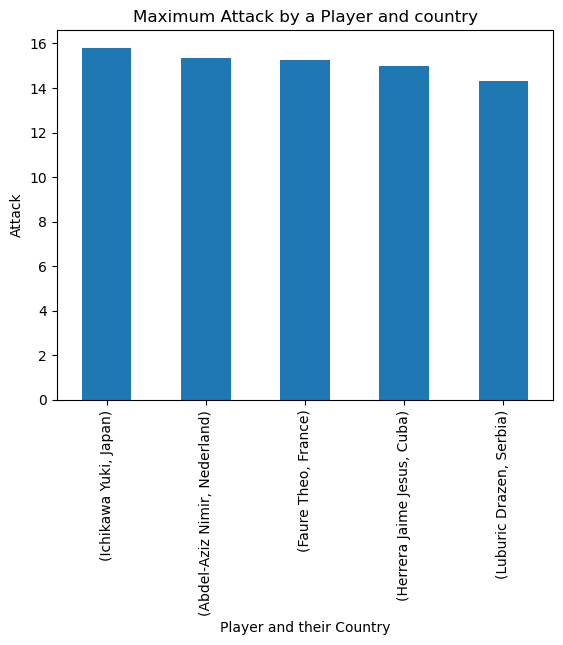

In [119]:
player_name.sort_values(ascending = False).head(5).plot(kind="bar")
plt.title("Maximum Attack by a Player and country")
plt.xlabel("Player and their Country")
plt.ylabel("Attack")
plt.show()

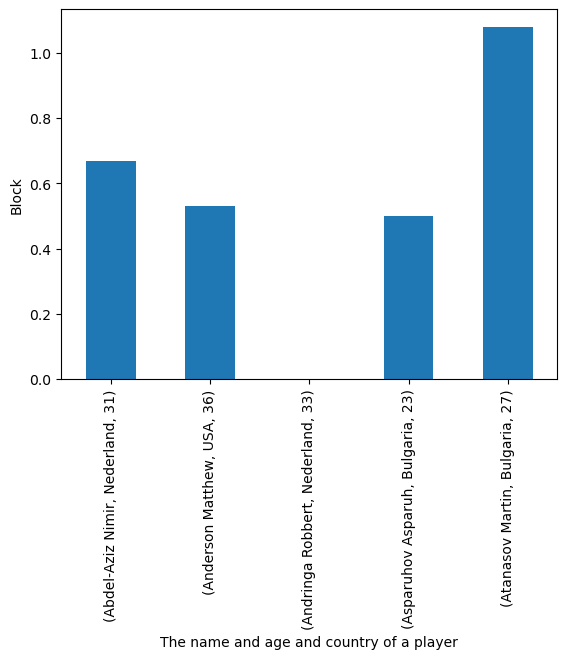

In [133]:
abc = df.groupby(["Player","Country","Age"])["Block"].max().head(5).plot(kind="bar")
plt.xlabel("The name and age and country of a player")
plt.ylabel("Block")
plt.show()

In [142]:
df.groupby(["Country","Position"])["Attack"].max().reset_index().sort_values(ascending = False , by ="Attack").head(10)

,Country,Position,Attack
52,Japan,OH,15.80
58,Nederland,OP,15.33
33,France,OP,15.25
28,Cuba,OP,15.00
68,Serbia,OP,14.33
12,Bulgaria,OH,14.25
22,China,OH,13.50
72,Slovenia,OH,12.62
8,Brazil,OP,12.46
48,Italy,OP,12.33


In [143]:
df.groupby("Country")["Dig"].sum()

Country
Argentina    33.88
Brazil       24.61
Bulgaria     22.45
Canada       26.50
China        22.08
Cuba         20.26
France       38.59
Germany      20.92
Iran         24.25
Italy        35.89
Japan        32.38
Nederland    21.84
Poland       32.56
Serbia       30.64
Slovenia     33.85
USA          28.42
Name: Dig, dtype: float64

# Scattered Chart

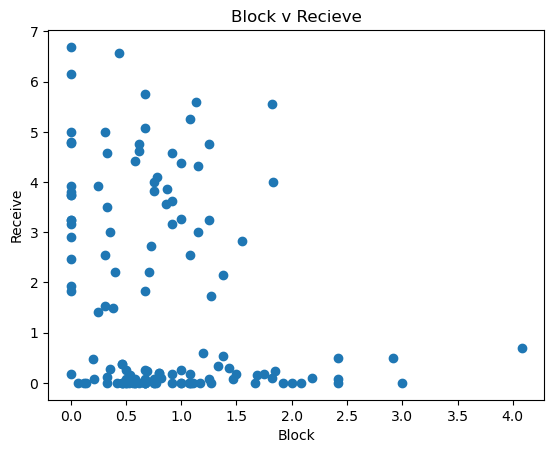

In [162]:
plt.scatter(df["Block"],df["Receive"])
plt.title("Block v Recieve")
plt.xlabel("Block")
plt.ylabel("Receive")
plt.show()

In [149]:
df.columns
#df.rename(columns={"Recieve": "-----new name---"},inplace=True)  to rename a column

Index(['Player', 'Country', 'Age', 'Attack', 'Block', 'Serve', 'Set', 'Dig',
       'Receive', 'Position'],
      dtype='object')

# Box Plot Chart

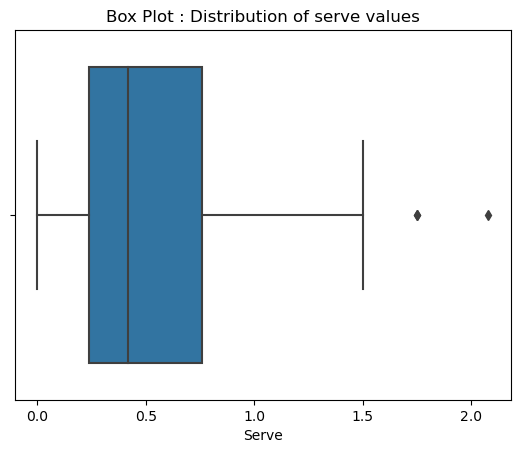

In [163]:
sns.boxplot(x=df["Serve"])
plt.title("Box Plot : Distribution of serve values")
plt.xlabel("Serve")
plt.show()

# Histogram Chart

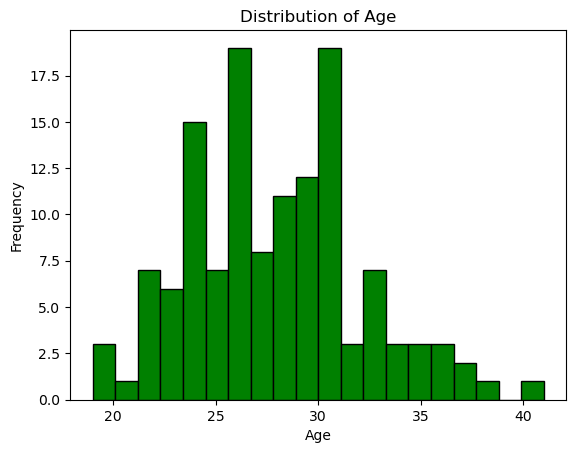

In [168]:
plt.hist(df["Age"],bins = 20,color="green",edgecolor="black")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

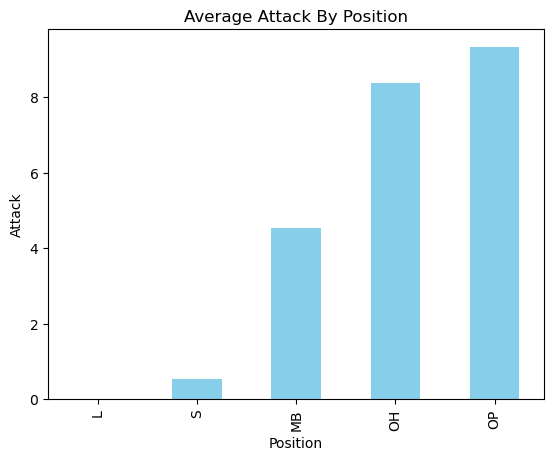

In [180]:
avg_attack_by_position = df.groupby("Position")["Attack"].mean()
avg_attack_by_position.sort_values(ascending = True).plot(kind="bar" , color = "skyblue")
plt.title("Average Attack By Position")
plt.xlabel("Position")
plt.ylabel("Attack")
plt.show()

# Line Chart

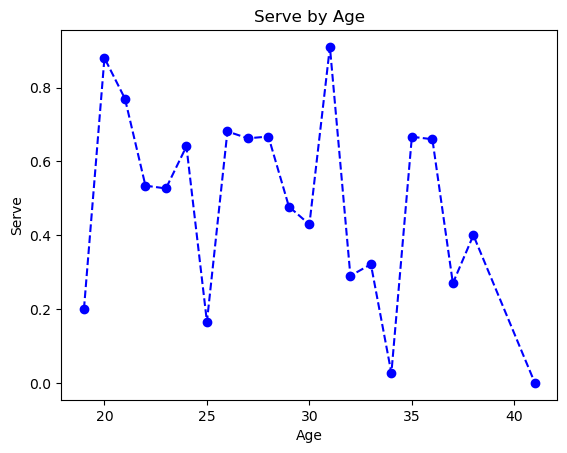

In [191]:
serve_trend_by_age = df.groupby("Age")["Serve"].mean()
serve_trend_by_age.plot(kind="line", marker="o", linestyle="--", color="blue" )
plt.title("Serve by Age")
plt.xlabel("Age")
plt.ylabel("Serve")
plt.show()

# Stacked Bar Chart

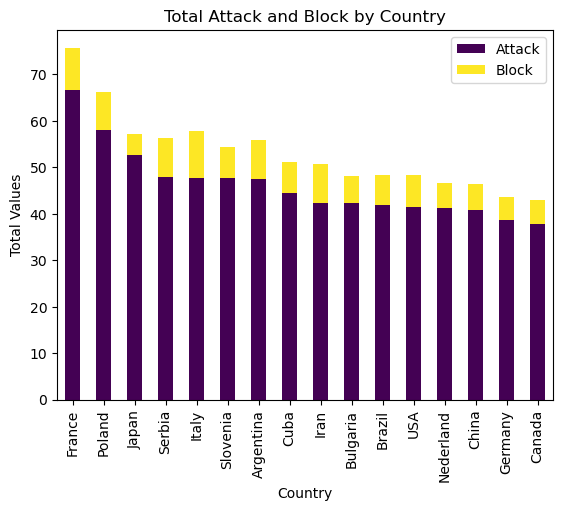

In [199]:
total_attack_block_by_country = df.groupby("Country")[["Attack","Block"]].sum()
total_attack_block_by_country.sort_values(ascending = False , by = 'Attack').plot(kind="bar",stacked =True, colormap = "viridis")
plt.title("Total Attack and Block by Country")
plt.xlabel("Country")
plt.ylabel("Total Values")
plt.show()